<a href="https://colab.research.google.com/github/hungsvdut2k2/Medicial-Leaf-Regconition/blob/main/ModelMobilenetSSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!cp /content/gdrive/MyDrive/Datasets/PBL4.v3i.tfrecord.zip /content

In [3]:
!unzip /content/PBL4.v3i.tfrecord.zip

Archive:  /content/PBL4.v3i.tfrecord.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/Medicial-Leaf.tfrecord  
 extracting: test/Medicial-Leaf_label_map.pbtxt  
   creating: train/
 extracting: train/Medicial-Leaf.tfrecord  
 extracting: train/Medicial-Leaf_label_map.pbtxt  


In [4]:
!git clone https://github.com/tensorflow/models.git
!git clone https://github.com/thangnch/MiAI_SSD_TF2

Cloning into 'models'...
remote: Enumerating objects: 79144, done.
remote: Counting objects: 100% (471/471), done.
remote: Compressing objects: 100% (227/227), done.
remote: Total 79144 (delta 262), reused 437 (delta 242), pack-reused 78673
Receiving objects: 100% (79144/79144), 593.93 MiB | 39.57 MiB/s, done.
Resolving deltas: 100% (56253/56253), done.
Cloning into 'MiAI_SSD_TF2'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.


In [5]:
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

/content/models/research


In [6]:
%cd /content/models/research
!cp object_detection/packages/tf2/setup.py . 
!python -m pip install .


/content/models/research
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 13.2 MB 28.9 MB/s 
     |████████████████████████████████| 352 kB 67.8 MB/s 
     |████████████████████████████████| 2.3 MB 69.5 MB/s 
     |████████████████████████████████| 26.9 MB 1.4 MB/s 
     |████████████████████████████████| 67 kB 8.0 MB/s 
     |████████████████████████████████| 116 kB 80.1 MB/s 
     |████████████████████████████████| 636 kB 74.6 MB/s 
     |████████████████████████████████|

In [7]:
!python object_detection/builders/model_builder_tf2_test.py

2022-11-27 12:54:17.343681: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-27 12:54:18.523498: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-27 12:54:18.523724: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-27 12:54:18.523748: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [8]:
import os
os.mkdir('/content/pretrained')

In [11]:
%cd /content/pretrained/

/content/pretrained


In [13]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
!tar -xzvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

--2022-11-27 12:55:53--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.111.128, 2607:f8b0:4004:c19::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.111.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  46.0MB/s    in 0.4s    

2022-11-27 12:55:53 (46.0 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tp

In [15]:
%cd /content/models/research
%cp /content/models/research/object_detection/model_main_tf2.py /content

/content/models/research


In [44]:
!python model_main_tf2.py \
--pipeline_config_path=/content/pretrained/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config \
--model_dir=/content/gdrive/MyDrive/output_model --alsologtostderr --num_train_steps=100000


Streaming output truncated to the last 5000 lines.
 'Loss/total_loss': 0.23019159,
 'learning_rate': 0.06651013}
I1127 13:58:31.199612 140136582006656 model_lib_v2.py:708] {'Loss/classification_loss': 0.114117414,
 'Loss/localization_loss': 0.014139127,
 'Loss/regularization_loss': 0.10193505,
 'Loss/total_loss': 0.23019159,
 'learning_rate': 0.06651013}
INFO:tensorflow:Step 14300 per-step time 0.064s
I1127 13:58:37.558359 140136582006656 model_lib_v2.py:707] Step 14300 per-step time 0.064s
INFO:tensorflow:{'Loss/classification_loss': 0.08988836,
 'Loss/localization_loss': 0.012237405,
 'Loss/regularization_loss': 0.101714484,
 'Loss/total_loss': 0.20384026,
 'learning_rate': 0.06631755}
I1127 13:58:37.558730 140136582006656 model_lib_v2.py:708] {'Loss/classification_loss': 0.08988836,
 'Loss/localization_loss': 0.012237405,
 'Loss/regularization_loss': 0.101714484,
 'Loss/total_loss': 0.20384026,
 'learning_rate': 0.06631755}
INFO:tensorflow:Step 14400 per-step time 0.064s
I1127 13:58

In [45]:
%cd /content/models/research
%cp /content/models/research/object_detection/exporter_main_v2.py /content

/content/models/research


In [46]:
!python exporter_main_v2.py \
--trained_checkpoint_dir=/content/gdrive/MyDrive/output_model \
--pipeline_config_path=/content/pretrained/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config \
--output_directory=/content/gdrive/MyDrive/export_model

2022-11-27 14:44:28.682797: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-27 14:44:28.682967: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-27 14:44:28.682988: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow ver

In [47]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

#Load model
tf.keras.backend.clear_session()
model = tf.saved_model.load("/content/gdrive/MyDrive/export_model/saved_model")

In [48]:
import cv2
def run_inference_for_single_image(model, image):
  
  image = np.asarray(image)
  input_tensor = tf.convert_to_tensor(image)
  input_tensor = input_tensor[tf.newaxis,...]

  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  if 'detection_masks' in output_dict:
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

def load_image_into_numpy_array(path):
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

/content/models/research
Done load image 
Done inference
Done draw on image 


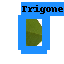

In [52]:
%cd /content/models/research
category_index = label_map_util.create_category_index_from_labelmap("/content/train/Medicial-Leaf_label_map.pbtxt", use_display_name=True)

image_path = '/content/TF-S-036_jpg.rf.e49e2c4ecdb7a3c5e7f15e79e80724e0.jpg'
image_np = load_image_into_numpy_array(image_path)
print("Done load image ")
image_np = cv2.resize(image_np, dsize=None, fx=0.2, fy=0.2)
output_dict = run_inference_for_single_image(model, image_np)
print("Done inference")
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    output_dict['detection_boxes'],
    output_dict['detection_classes'],
    output_dict['detection_scores'],
    category_index,
    instance_masks=output_dict.get('detection_masks_reframed', None),
    use_normalized_coordinates=True,
    line_thickness=8)
print("Done draw on image ")
display(Image.fromarray(image_np))